In [26]:
import pandas as pd
import re
#!pip install nltk
import nltk
import numpy as np 
import os
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # download tokenizer - to split text strings into words
from nltk.stem import PorterStemmer

from wordcloud import WordCloud
import matplotlib.pyplot as plt



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Blanca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Blanca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
cwd = os.getcwd()
#df = pd.read_csv(cwd + '/scraped_hotel_data(1).csv')
#df = pd.read_csv(cwd + '/scraped_hotel_data.csv')
df = pd.read_csv(cwd + '/text_mining_1/scraped_hotel_data.csv')
df.head()

,URL,Hotel,Description,City,start_date,end_date,Rating,Price
0,https://www.booking.com/hotel/es/tembo-barcelo...,Tembo Barcelona,"Tembo Barcelona está en Barcelona, a 16 min a ...",Barcelona,2025-06-03,2025-06-09,8.8,€ 3.066
1,https://www.booking.com/hotel/es/sonder-paseo-...,Sonder Paseo de Gracia,Sonder Paseo de Gracia está muy bien situado e...,Barcelona,2025-06-03,2025-06-09,8.4,€ 1.962
2,https://www.booking.com/hotel/es/two-barcelona...,Axel TWO Barcelona 4 Sup - Adults Only,El TWO Hotel Barcelona by Axel está situado en...,Barcelona,2025-06-03,2025-06-09,8.3,€ 1.898
3,https://www.booking.com/hotel/es/hotel-viladom...,Hotel Viladomat,El Hotel Viladomat goza de una ubicación idóne...,Barcelona,2025-06-03,2025-06-09,7.6,€ 1.433
4,https://www.booking.com/hotel/es/ohla-eixample...,Ohla Eixample,"El hotel boutique Ohla Eixample es elegante, t...",Barcelona,2025-06-03,2025-06-09,9.0,€ 2.945


In [28]:
# renaming columns for simplicity
df.columns = ['url', 'hotel', 'description', 'city', 'start_date', 'end_date',
       'rating', 'price']
df.dtypes

url             object
hotel           object
description     object
city            object
start_date      object
end_date        object
rating         float64
price           object
dtype: object

In [29]:
# ADDING BOOLEAN COLUMNS FOR BARCELONA AND FOR PRIMAVERA SOUND DATES

df['bcn_bool'] = np.where(df.city == 'Barcelona', 1, 0)
df['primavera_sound_bool'] = np.where(df.start_date == '2025-06-03', 1, 0)

In [30]:
# TURNING PRICE COLUMN INTO FLOATS
df.price = df.price.str.replace('€', '', regex=False).str.replace('.', '', regex=False).str.strip()
df.price = df.price.astype(float)

In [31]:
df.head()

,url,hotel,description,city,start_date,end_date,rating,price,bcn_bool,primavera_sound_bool
0,https://www.booking.com/hotel/es/tembo-barcelo...,Tembo Barcelona,"Tembo Barcelona está en Barcelona, a 16 min a ...",Barcelona,2025-06-03,2025-06-09,8.8,3066.0,1,1
1,https://www.booking.com/hotel/es/sonder-paseo-...,Sonder Paseo de Gracia,Sonder Paseo de Gracia está muy bien situado e...,Barcelona,2025-06-03,2025-06-09,8.4,1962.0,1,1
2,https://www.booking.com/hotel/es/two-barcelona...,Axel TWO Barcelona 4 Sup - Adults Only,El TWO Hotel Barcelona by Axel está situado en...,Barcelona,2025-06-03,2025-06-09,8.3,1898.0,1,1
3,https://www.booking.com/hotel/es/hotel-viladom...,Hotel Viladomat,El Hotel Viladomat goza de una ubicación idóne...,Barcelona,2025-06-03,2025-06-09,7.6,1433.0,1,1
4,https://www.booking.com/hotel/es/ohla-eixample...,Ohla Eixample,"El hotel boutique Ohla Eixample es elegante, t...",Barcelona,2025-06-03,2025-06-09,9.0,2945.0,1,1


# Basic Text Analysis
To do:
* Drop stopwords from descriptions
* Stemming in descriptions

## Stopwords

In [32]:
# STOPWORDS

stop_words = set(stopwords.words('spanish'))

custom_stopwords = set(stop_words)
#custom_stopwords.update([list])  # add words??
additional_stopwords = [
    'de', 'del', 'en', 'la', 'el', 'los', 'las', 'y', 'al', 'para', 'por',
    'hotel', 'establecimiento', 'habitaciones', 'se', 'encuentra', 'además', 'madrid', 'barcelona'
]

# Update the custom stopword set with additional stopwords
custom_stopwords.update(additional_stopwords)
# Removing words
remove_list = ['ante', 'con', 'desde', 'sin']
for word in remove_list:
    custom_stopwords.discard(word)
print(sorted(custom_stopwords))

['a', 'además', 'al', 'algo', 'algunas', 'algunos', 'antes', 'barcelona', 'como', 'contra', 'cual', 'cuando', 'de', 'del', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'encuentra', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'establecimiento', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fu

In [33]:
# function to remove stopwords
def clean_text(text, stopwords):
    # 1. tokenize the text
    words = re.findall(r'\b\w+\b', text.lower())
    # 2. remove stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words) 

# Apply the clean_text function to the 'text' column
df['clean_description'] = df['description'].apply(lambda x: clean_text(x, custom_stopwords))

# Display the cleaned DataFrame
df[['description', 'clean_description']]

,description,clean_description
0,"Tembo Barcelona está en Barcelona, a 16 min a ...",tembo 16 min pie platja llevant dispone alojam...
1,Sonder Paseo de Gracia está muy bien situado e...,sonder paseo gracia bien situado barrio eixamp...
2,El TWO Hotel Barcelona by Axel está situado en...,two by axel situado pleno barrio gay 2 km play...
3,El Hotel Viladomat goza de una ubicación idóne...,viladomat goza ubicación idónea menos 10 minut...
4,"El hotel boutique Ohla Eixample es elegante, t...",boutique ohla eixample elegante piscina exteri...
...,...,...
384,"Gran View Apartments está en Madrid, a 3 min a...",gran view apartments 3 min pie gran vía 400 me...
385,El Hostal Josefina-Gran Vía goza de una ubicac...,hostal josefina gran vía goza ubicación privil...
386,MintyStay - Divino Pastor está en el centro de...,mintystay divino pastor centro 13 min pie gran...
387,Madrid Sol Home es un alojamiento bien situado...,sol home alojamiento bien situado centro ofrec...


## Stemming

In [34]:

ps = PorterStemmer()

# Your preprocess_stem function
def preprocess_stem(text):
    # Tokenize the cleaned text
    tokens = word_tokenize(text)
    
    # Stem each token
    stemmed_tokens = [ps.stem(token) for token in tokens]
    
    # Join the stemmed tokens into a single string
    return " ".join(stemmed_tokens)

# Apply preprocess_stem to the 'clean_description' column
df['stemmed_description'] = df['clean_description'].apply(preprocess_stem)

# Display the original, cleaned, and stemmed descriptions
df[['description', 'clean_description', 'stemmed_description']].head()


,description,clean_description,stemmed_description
0,"Tembo Barcelona está en Barcelona, a 16 min a ...",tembo 16 min pie platja llevant dispone alojam...,tembo 16 min pie platja llevant dispon alojami...
1,Sonder Paseo de Gracia está muy bien situado e...,sonder paseo gracia bien situado barrio eixamp...,sonder paseo gracia bien situado barrio eixamp...
2,El TWO Hotel Barcelona by Axel está situado en...,two by axel situado pleno barrio gay 2 km play...,two by axel situado pleno barrio gay 2 km play...
3,El Hotel Viladomat goza de una ubicación idóne...,viladomat goza ubicación idónea menos 10 minut...,viladomat goza ubicación idónea meno 10 minuto...
4,"El hotel boutique Ohla Eixample es elegante, t...",boutique ohla eixample elegante piscina exteri...,boutiqu ohla eixampl elegant piscina exterior ...


## Wordclouds

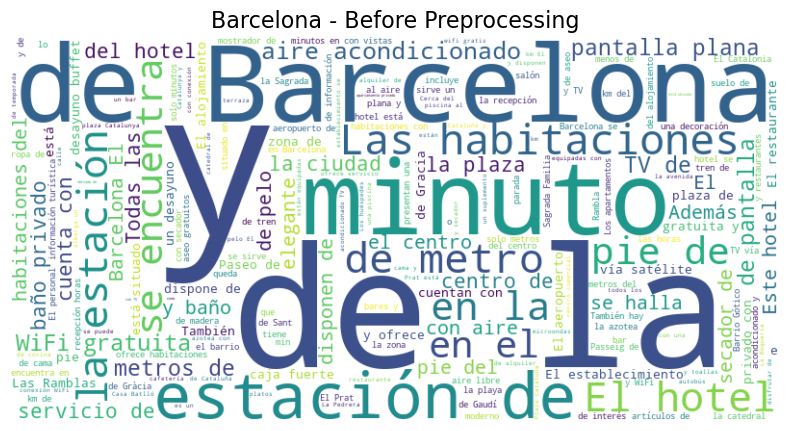

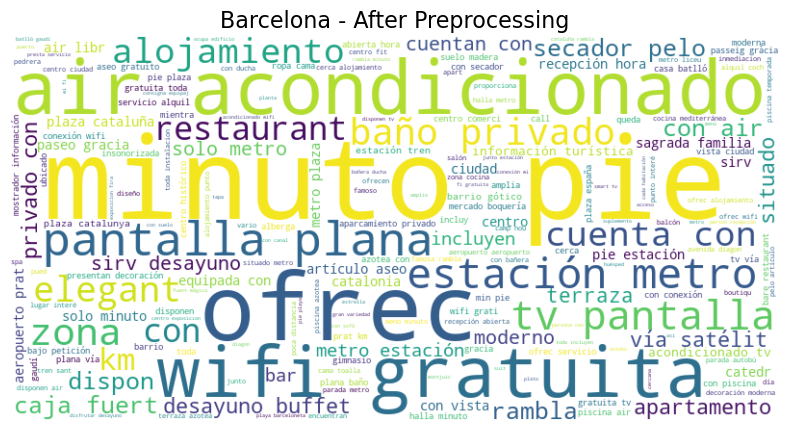

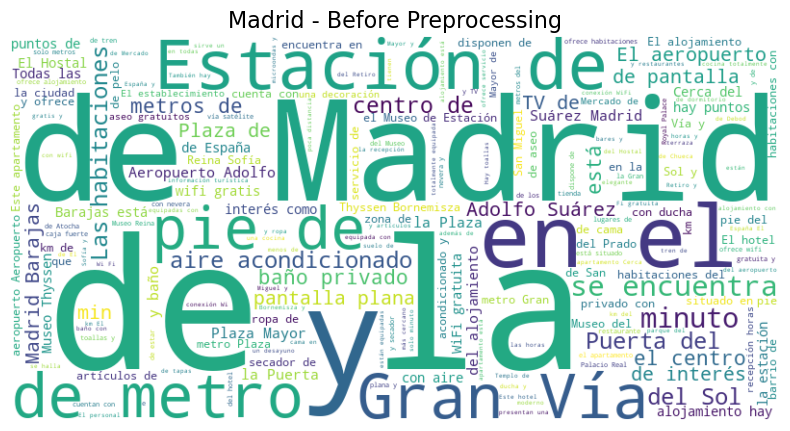

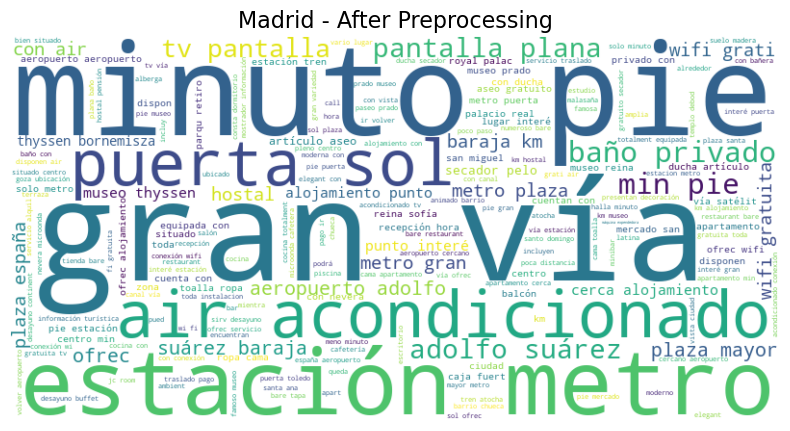

In [35]:
# Combine all descriptions for each city before and after preprocessing
barcelona_text_before = ' '.join(df[df['city'] == 'Barcelona']['description'])
barcelona_text_after = ' '.join(df[df['city'] == 'Barcelona']['stemmed_description'])

madrid_text_before = ' '.join(df[df['city'] == 'Madrid']['description'])
madrid_text_after = ' '.join(df[df['city'] == 'Madrid']['stemmed_description'])

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Generate word clouds for Barcelona
generate_wordcloud(barcelona_text_before, "Barcelona - Before Preprocessing")
generate_wordcloud(barcelona_text_after, "Barcelona - After Preprocessing")

# Generate word clouds for Madrid
generate_wordcloud(madrid_text_before, "Madrid - Before Preprocessing")
generate_wordcloud(madrid_text_after, "Madrid - After Preprocessing")


### Interpretation

*Non-Processed:*

We can clearly see how common Spanish stopwords such as "de," "la," "y," and "en" dominate the non-preprocessing word clouds, slightly overshadowing meaningful terms.
General hotel-related terms like "habitaciones," "minuto," and "estación" are present but less prominent due to the noise from stopwords.
Proper nouns like "Barcelona" are highlighted, which aligns with the context of the dataset.

*After Processing:*

The removal of stopwords like "de," "la," "y," and "en" makes the word cloud more focused on relevant terms.
Words such as "minuto," "pie," "metro," "pantalla plana," and "aire acondicionado" become dominant, leading to a clearer picture of key features in hotel descriptions.
Specific amenities and location-related words like "wifi gratuita" and "elegante" stand out, which are more useful for analysis.

*General*:

In general, regarding our Event Analysis, these wordclouds do not do a ton for us wrt. the specific research question.(i.e. we cannot see event related terms in the Barcelona wordcloud) However, this makes sense as hotels do not change their descriptions depending on an event. 
However, we can see quite well how pre processing helps and what the main themes of the hotel descriptions are. (i.e. business travel or tourism related terms)

# DiD Regression

## a)

### Difference-in-Differences (DiD) Regression to Analyze Event Effects on Prices

To estimate the effect of an event (e.g., Primavera Sound) on hotel prices, we can use a Difference-in-Differences (DiD) regression with fixed effects. The regression equation is as follows:

$$
\text{price}_{ict} = \beta_0 + \beta_1 (\text{event}_t) + \beta_2 (\text{treated}_c) + \beta_3 (\text{event}_t \times \text{treated}_c) +\mathbf{X}_{ict}\mathbf{w}_{ict}+ \epsilon_{ict}
$$


Where :

Dependent variable:
- price = Price of a hotel in city *c* at time *t* for hotel *i* (dependent variable).

Independent variables:
- $\beta_0$ = The intercept of the regression equation.
- $\beta_1$ = Captures the difference in prices between the event timeframe and non-event timeframe. *event* is a binary variable that equals 1 during the event period (e.g., Primavera Sound) and 0 otherwise.
- $\beta_2$ = Captures the difference in prices between the treated city (Barcelona) and the control city (Madrid). *event* is a binary variable that equals 1 for Barcelona (treated city) and 0 for the control city (e.g., Madrid).
- $\beta_3$ = The interaction term (Difference-in-Differences term), which measures the treatment effect of the event on hotel prices in Barcelona.
- $ \mathbf{X}_{ict} $: Vector of other control variables. See examples below! (e.g., hotel ratings, characteristics) to account for heterogeneity.
- $ \mathbf{w}_{ict} $: Corresponding coefficients of additional control variables.
- $\epsilon_{ict}$: Error term.


indices:

- *i*: hotel
- *t*: timeframe
- *c*: city




### Controls to Include
1. **Hotel Ratings**:  
   Controls for the effect of hotel quality on prices.


2. **Other Events** :  
   Ensures price changes are not driven by overlapping events.

3. **Text Features**:  
   As described below, ie. sentiment analysis

4. **Seasonality**:
   Indicates whether there is a seasonal pattern for the respective city, influencing the price and availability of hotels
---

### Why is a Second City Necessary?
Including a second city (e.g., Madrid) as a control group is crucial for the Difference-in-Differences methodology:
1. **Counterfactual Analysis**:  
   The control city provides a counterfactual to estimate what would have happened to hotel prices in Barcelona if the event had not occurred.

2. **Parallel Trends Assumption**:  
   The method assumes that, in the absence of the event, the price trends in the treated city (Barcelona) and the control city (Madrid) would have been the same. This helps isolate the causal effect of the event.

3. **Event-Specific Effects**:  
   Without a second city, it's impossible to distinguish between price changes caused by the event and those caused by general economic conditions or demand trends.

---


## b)

### How can we include text features and how does it help?

There are many different ways on how to include text features in this analysis. We will suggest to possible methods here.

1. **Sentiment Analysis**

We can perform a sentiment analysis on the hotel descriptions to generate a sentiment score. This can be used as a control variable in the regression to account for the sentiment and tone of the discription. It ccaptures intrinsic characteristic of the hotel. For example, a luxury hotel might see price increases due to both its positive attributes and the event, which could impact the estimate of the event's effect. However, this should be handled with care as it could interfer with variables like Hotel Ratings if included - leading to multicollinearity. 


2. **Keywords**

Another way is to extract keywords and using them as frequencies or binary indicators as control variables. It can capture specific characteristics or amenities of hotels that influence prices but are not directly included in ratings or sentiment analysis.


**Why terms like 'Barcelona' would not help**

1. Most descriptions metion the corresponding cityname anyways, adding no valuable information because it is included everywhere
2. The city name is already included the City variable, making it redundant. In fact, including terms like "Barcelona" or "Madrid" could create problems because this would reveal group membership. It would give away whether the description is form the treated vs the ccontrol group, leading to a potentially biased estimate.

## c)

### Decomposing the Treatment Effect by Hotel Quality

If we want to decompose the treatment effect by hotel quality, we simply add this to out regression equaiton.Specifically, we can use interaction terms between the treatment effect and hotel quality indicators derived from the text descriptions.


**How would you use them to study heterogenous
treatment effects?**

In our context of the event (e.g., Primavera Sound), we could use them to answer the following questions:
How does hotel Quality impact the price (difference)
High-quality vs. Low-quality Hotels:
    High-quality hotels might see a larger price increase during the event because they attract wealthier customers or because demand for premium accommodations increases during events. On the other hand low-quality hotels might not benefit as much because their customers are more price-sensitive.
    However, this could also be the other way around, maybe depending on the event.

**Can you use the text description here?**

Hotel quality could for example be approximated by sentiment scores extracted from the text descriptions. Of course, this is only one way.
We could also specific information like keyword for anemnities. 
It can be converted to a binary variable, indicating *high-quality* and *low-quality* hotels. We will add this to the regression equation to answer the next task:

**Write down a regression equation.**


$$
\text{price}_{ict} = \beta_0 + \beta_1 (\text{event}_t) + \beta_2 (\text{treated}_c) + \beta_3 (\text{event}_t \times \text{treated}_c) + \beta_4 (\text{event}_t \times \text{treated}_c \times \text{quality}_i) +\mathbf{X}_{ict}\mathbf{w}_{ict}+ \epsilon_{ict}
$$

where 
- $\beta_4$ ist the additional interaction term (Difference-in-Differences term), capturing the heterogeneous treatment effect.


# Running the Regression

In [36]:
#The ratings column has a missing value, so we will fill it with the mean for its city.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df.rating = df.groupby('city')['rating'].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten())

In [37]:
df.columns

Index(['url', 'hotel', 'description', 'city', 'start_date', 'end_date',
       'rating', 'price', 'bcn_bool', 'primavera_sound_bool',
       'clean_description', 'stemmed_description'],
      dtype='object')

In [40]:
import statsmodels.api as sm

df['beta_3'] = df.bcn_bool * df.primavera_bool
df['beta_4'] = df.bcn_bool * df.primavera_bool * df.rating
df.rename(columns={'primavera_sound_bool':'beta_1', 'bcn_bool':'beta_2'}, inplace=True)

X = sm.add_constant(df[['beta_1', 'beta_2', 'beta_3', 'beta_4']])
y = df.price

regression = sm.OLS(y,X).fit()

regression.summary()

AttributeError: 'DataFrame' object has no attribute 'primavera_bool'